# MATH50003 Numerical Analysis (2021–2022) Practice Computer-based Exam


For each problem, replace the `# TODO` to complete the question.
The unit tests are provided to help you test your answers.
You have 1 hour to complete the exam, as well as 1 hour for downloading/uploading.

Problems are marked A/B/C to indicate difficulty ("A" being most difficult).
Partial credit will be awarded for reasonable attempts even if the tests
are not passed.

You may use existing code from anywhere
but you are **REQUIRED** to cite the source if it is not part of the module material,
ideally by including a weblink in a comment. You **MUST NOT** ask for help online or
communicate with others within or outside the module.
Failure to follow these rules will be considered misconduct.



You should use the following packages:

In [1]:
using LinearAlgebra, SetRounding, Test

**WARNING** It may be necessary to restart the kernel if issues arise. Remember to reload the packages
when you do so.

## 1. Numbers

**Problem 1.1 (C)** Complete the following function `divideby3(x)` that
returns a tuple `a,b` such that `a` is the largest `Float64` less 
than or equal to `x/3` and `b` is the smallest `Float64` greater than or equal to `x/3`.

### My Solution

In [2]:
function divideby3(x)
    x = big(x)
    # TODO: assign a,b so that a ≤ x ≤ b where b is either equal to a or the next float
    a = Float64(x/3, RoundDown)
    b = Float64(x/3, RoundUp)
    return a, b
end

divideby3 (generic function with 1 method)

### Provided Solution

In [2]:
function divideby3(x)
    a = setrounding(Float64, RoundDown) do
        x / 3
    end
    b = setrounding(Float64, RoundUp) do
        x / 3
    end
    return a, b
end

divideby3 (generic function with 1 method)

In [3]:
x = 0.1 # arbitary x
a,b = divideby3(x)
@test a ≤ big(x)/3 ≤ b
@test b == a || b == nextfloat(a)

Test Passed

## 2. Differentiation

**Problem 2.1 (C)** Use the following off-center finite-difference approximation
$$
f'(x) ≈ {f(x+2h) - f(x-h) \over 3h}
$$
with an appropriately chosen $h$ to approximate
$$
f(x) = \cos(x^2)
$$
at $x = 0.1$ to 5 digits accuracy.

In [4]:
function fd(x)
    # TODO: implement a finite-difference rule 
    # to approximate f'(x)
    # for f(x) = cos(x^2)
    # with step-size h chosen to get sufficient accuracy
    #---------------------------------------------------
    f = y -> cos(y^2)
    h = 0.0001
    return (f(x + 2*h) - f(x - h)) / (3*h)
end

fd (generic function with 1 method)

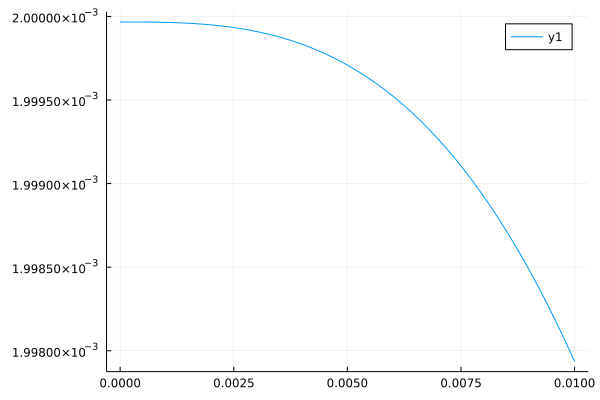

In [14]:
# Testing
function fdh(h, x)
    f = y -> cos(y^2)
    return (f(x + 2*h) - f(x - h)) / (3*h)
end

h = range(0, 0.01; length=1000)

g = y -> -2*y*sin(y^2)

using Plots
plot(h, abs.(fdh.(h, 0.1) .- g(0.1)))



Note: For finite differences we should choose h = $\sqrt{ \epsilon }$

In [5]:
@test abs(fd(0.1) + 2*0.1*sin(0.1^2)) ≤ 1E-5

Test Passed

**Problem 2.2 (A)** Consider a 2D version of a dual number:
$$
a + b ϵ_x + c ϵ_y
$$
such that
$$
ϵ_x^2 = ϵ_y^2 = ϵ_x ϵ_y =  0.
$$
Complete the following implementation supporting `+` and `*` (and
assuming `a,b,c` are `Float64`). Hint: you may need to work out on paper
how to multiply `(s.a + s.b ϵ_x + s.c ϵ_y)*(t.a + t.b ϵ_x + t.c ϵ_y)` using the
relationship above.

In [6]:
import Base: *, +, ^
struct Dual2D
    a::Float64
    b::Float64
    c::Float64
end


function +(s::Dual2D, t::Dual2D)
    ## TODO: Implement +, returning a Dual2D
    return Dual2D(s.a + t.a, s.b + t.b, s.c + t.c)
end

function *(r::Number, s::Dual2D)
    ## TODO: Implement r * Dual2D(...), returning a Dual2D
    return Dual2D(r*s.a, r*s.b, r*s.c)
end

*(s::Dual2D, r::Number) = r * s  # Commutative

function *(s::Dual2D, t::Dual2D)
    ## TODO: Implement Dual2D(...) * Dual2D(...), returning a Dual2D
    return Dual2D(s.a*t.a, s.a*t.b + s.b*t.a, s.a*t.c + s.c*t.a)
end

* (generic function with 699 methods)

In [7]:
f = function (x, y) # (x+2y^2)^3 using only * and +
    z = (x + 2y * y)
    z * z * z
end

x,y = 1., 2.
@test f(Dual2D(x,1.,0.), Dual2D(y,0.,1.)) == Dual2D(f(x,y), 3(x+2y^2)^2, 12y*(x+2y^2)^2)

# This has computed the gradient as f(x,y) + f_x*ϵ_x + f_y*ϵ_y
# == (x+2y^2)^3 + 3(x+2y^2)^2*ϵ_x + 12y(x+2y^2)^2*ϵ_y

Test Passed

## 3. Structured Matrices

**Problem 3.1 (C)** Add an implementation of `inv(::PermutationMatrix)`
to return the inverse permutation as a `PermutationMatrix`. Hint: use
`invperm`.

In [8]:
import Base: getindex, size, *, inv

struct PermutationMatrix <: AbstractMatrix{Int}
    p::Vector{Int} # represents the permutation whose action is v[p]
    function PermutationMatrix(p::Vector)
        sort(p) == 1:length(p) || error("input is not a valid permutation")
        new(p)
    end
end

size(P::PermutationMatrix) = (length(P.p),length(P.p))
getindex(P::PermutationMatrix, k::Int, j::Int) = P.p[k] == j ? 1 : 0
*(P::PermutationMatrix, x::AbstractVector) = x[P.p]

function inv(P::PermutationMatrix)
    # TODO: return a PermutationMatrix representing the inverse permutation
    return PermutationMatrix(invperm(P.p))
end

inv (generic function with 99 methods)

In [9]:
P = PermutationMatrix([3,4,2,1])
@test inv(P) isa PermutationMatrix
@test P*inv(P) == I

Test Passed

## 4. Decompositions

**Problem 4.1 (C)** For $𝐱 ∈ ℝ^n$ implement the reflection defined by
$$
\begin{align*}
𝐲 &:= 𝐱 + \|𝐱\| 𝐞_n \\
𝐰 &:= 𝐲/\|𝐲\| \\
Q_𝐱 &:= I - 2𝐰𝐰^⊤
\end{align*}
$$
in `lowerhouseholderreflection(x)`, which should return a `Matrix{Float64}`.
You may assume that `x` is a `Vector{Float64}`.

In [18]:
function lowerhouseholderreflection(x::Vector{Float64})
    ## TODO: implement the householder reflector defined above
    n = length(x)
    eₙ = zeros(n)
    eₙ[n] = 1.0
    y = x + norm(x)*eₙ
    w = y / norm(y)
    Q = I - 2*w*w'
    return Q
end

lowerhouseholderreflection (generic function with 1 method)

In [26]:
x = [1.0,2, 3]
A = [5.0 2 1; 6 4 2; 1 7 3]
Q = lowerhouseholderreflection(x)
Q*A

3-element Array{Float64,1}:
 -2.220446049250313e-16
 -4.440892098500626e-16
 -3.741657386773942

In [25]:
norm(x)

5.477225575051661

In [19]:
x = [1.0,2,3,4]
Q = lowerhouseholderreflection(x)
@test Q*x ≈ [zeros(3); -norm(x)]
@test Q'Q ≈ I
@test Q ≈ Q'

Test Passed

**Problem 4.2 (A)** Complete the function `ql(A)` that
returns a QL decomposition, that is, `Q` is an orthogonal
matrix and `L` is lower triangular. You may assume that `A`
is a square `Matrix{Float64}`. Hint: use Problem 4.1 to lower triangularise.

In [23]:
function ql(A)
    m,n = size(A)
    m == n || error("not square")
    ## TODO Create Q and L such that Q'Q == I and L is lower triangular
    m, n = size(A)
    L = copy(A)
    Q = Matrix(1.0I, m, m)
    for j = 1:n
        Qⱼ = lowerhouseholderreflection(L[1:end-j+1, end-j+1])
        L[1:end-j+1, :] = Qⱼ * L[1:end-j+1, :]
        Q[:, 1:end-j+1] = Q[:, 1:end-j+1] * Qⱼ
    end
    return Q, L
end

ql (generic function with 1 method)

In [21]:
function ql(A)
    m,n = size(A)
    m == n || error("not square")
    ## TODO Create Q and L such that Q'Q == I and L is lower triangular
    ## SOLUTION
    L = copy(A)
    Q = Matrix(1.0I, n, n)
    for j = n:-1:2
        Qⱼ = lowerhouseholderreflection(L[1:j, j])
        L[1:j, 1:j] = Qⱼ * L[1:j, 1:j]
        Q[:,1:j] = Q[:,1:j]*Qⱼ
    end
    Q,L
    ## END
end


ql (generic function with 1 method)

In [24]:
A = [1.0 2 3; 1 4 9; 1 1 1]
Q,L = ql(A)
@test Q'Q ≈ I
@test Q*L ≈ A
@test L ≈ tril(L) # it is acceptable to have small non-zero entries in L

Test Passed

## 5. Singular Value Decomposition

**Problem 5.1 (C)** Find the best rank-4 approximation (in the $2$-norm) to
$$
f(x,y) = \cos(x - y)/(x+y+1)
$$
evaluated at an evenly spaced 100 × 100 grid on the square $[0,1]^2$.

In [15]:
function bestrank4()
    # TODO: return best rank-4 approximation
    #---------------------------------------
    # Define g(x, y)
    g(x, y) = cos(x - y) / (x + y + 1)
    n = 100
    # X and Y axis of our grid
    X = range(0, 1; length=n)
    Y = X
    # Create matrix of grid points, s.t a_ij = f(x_i, y_j)
    A = zeros(n, n)
    for (i, x) in enumerate(X)
        for (j, y) in enumerate(Y)
            A[i, j] = g(x, y)
        end    
    end
    U, σ, V = svd(A)
    rank = 4
    Σₖ = Diagonal(σ[1:rank])
    Uₖ = U[:, 1:rank]
    Vₖ = V[:, 1:rank]
    return Uₖ * Σₖ * Vₖ'
end

Fr = bestrank4()

100×100 Array{Float64,2}:
 0.999993  0.989945  0.979995  0.970141  …  0.281434  0.275776  0.270146
 0.989945  0.980195  0.970537  0.960968     0.284208  0.278592  0.273005
 0.979995  0.970537  0.961164  0.951874     0.286924  0.281352  0.275807
 0.970141  0.960968  0.951874  0.942857     0.289584  0.284055  0.278553
 0.96038   0.951486  0.942665  0.933915     0.292187  0.286703  0.281244
 0.95071   0.942088  0.933534  0.925045  …  0.294735  0.289295  0.283879
 0.941128  0.932772  0.924479  0.916246     0.297228  0.291832  0.286459
 0.931631  0.923536  0.915499  0.907516     0.299665  0.294314  0.288985
 0.922217  0.914378  0.90659   0.898853     0.302049  0.296742  0.291457
 0.912884  0.905295  0.897752  0.890255     0.304378  0.299117  0.293876
 0.90363   0.896286  0.888983  0.881721  …  0.306654  0.301438  0.296241
 0.894453  0.887348  0.88028   0.873248     0.308877  0.303706  0.298554
 0.885351  0.87848   0.871642  0.864836     0.311047  0.305921  0.300814
 ⋮                       

In [16]:
x = 9/99
y = 10/99
@test rank(Fr) == 4
@test abs(Fr[10,11] - cos(x - y)/(x + y + 1)) ≤ 2E-6

Test Passed

## 6. Differential Equations

**Problem 6.1 (A)** Complete the function `airyai(n)` that returns a length-$n$ `Vector{Float64}`
$$
\begin{bmatrix}
u_1 \\
⋮ \\
u_n
\end{bmatrix}
$$
such that $u_k$ approximates the solution to the equation
$$
\begin{align*}
u(0) &= 1 \\
u(1) &= 0 \\
u'' - x u &= 0
\end{align*}
$$
at the point $x_k = (k-1)/(n-1)$ using the second order finite-difference approximation:
$$
u''(x_k) ≈ {u_{k-1} - 2u_k + u{k+1} \over h^2}
$$
for $k = 2, …, n-1$, in $O(n)$ operations.

In [29]:
function airy(n)
    # TODO: return a Vector{Float64} approximating the solution to the ODE
    ## SOLUTION
    x = range(0, 1; length = n)
    h = step(x)
    A = SymTridiagonal(fill(-2 / h^2, n - 2) .- x[2:end-1], fill(1 / h^2, n - 3))
    u = A \ [-1 / h^2; zeros(n - 3)]
    [1; u; 0]
    ## END
end

airy (generic function with 1 method)

In [30]:
u = airy(1000)
@test u[1] == 1
@test u[end] == 0
# this compares agianst the exact formula
@test abs(u[500] - 0.4757167332829094) ≤ 2E-8

Test Passed

In [33]:
A = SymTridiagonal([2, 2, 2, 2], [3, 3, 3])

4×4 SymTridiagonal{Int64,Array{Int64,1}}:
 2  3  ⋅  ⋅
 3  2  3  ⋅
 ⋅  3  2  3
 ⋅  ⋅  3  2

In [39]:
[-1 / 2; zeros(5)]

3-element Array{Int64,1}:
 2
 3
 4